# Phy 481 Hw #5 - Andrew Koren

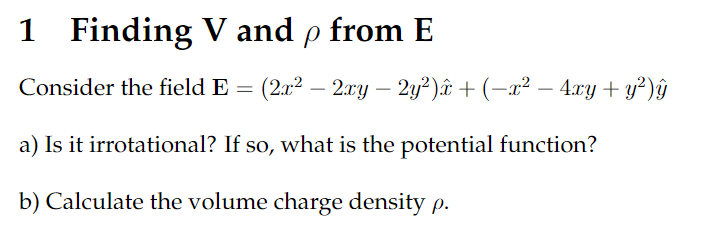

Part (a): Irrotational $\rightarrow$ Curl E = 0

In [34]:
import sympy
from sympy import latex
from sympy.vector import CoordSys3D, Del, laplacian

R = CoordSys3D('R')
x, y, z = R.x, R.y, R.z

del_operator = Del()


E = (2*x**2-2*x*y - 2*y**2)*R.i + (-x**2 -4*x*y+y**2)*R.j
E

(2*R.x**2 - 2*R.x*R.y - 2*R.y**2)*R.i + (-R.x**2 - 4*R.x*R.y + R.y**2)*R.j

In [35]:
cross_E = del_operator.cross(E)
cross_E

(Derivative(0, R.y) - Derivative(-R.x**2 - 4*R.x*R.y + R.y**2, R.z))*R.i + (-Derivative(0, R.x) + Derivative(2*R.x**2 - 2*R.x*R.y - 2*R.y**2, R.z))*R.j + (Derivative(-R.x**2 - 4*R.x*R.y + R.y**2, R.x) - Derivative(2*R.x**2 - 2*R.x*R.y - 2*R.y**2, R.y))*R.k

In [36]:
cross_E.doit()

0

The cross product is zero. since the electric field is the gradient of the scalar field, we can integrate each term based on their direction $\hat x, \hat y$ and find the common terms to get the voltage

In [37]:
from sympy import integrate
integrate(E.dot(R.i), x)

2*R.x**3/3 - R.x**2*R.y - 2*R.x*R.y**2

In [38]:
integrate(E.dot(R.j), y)

-R.x**2*R.y - 2*R.x*R.y**2 + R.y**3/3

Putting these together gives us

$$
V(x, y) = \frac{2 \mathbf{{x}}^{3}}{3} - \mathbf{{x}}^{2} \mathbf{{y}} - 2 \mathbf{{x}} \mathbf{{y}}^{2} + \frac{\mathbf{{y}}^{3}}{3}

$$

This can be verified by taking the gradient $E = -\nabla V$ using sympy

In [39]:
V = - (2/3 * x**3 - x**2 * y  - 2*x*y**2+1/3*y**3)
V

-0.666666666666667*R.x**3 + R.x**2*R.y + 2*R.x*R.y**2 - 0.333333333333333*R.y**3

In [40]:
grad_V = del_operator(V)
grad_V.doit()*-1

(2.0*R.x**2 - 2*R.x*R.y - 2*R.y**2)*R.i + (-R.x**2 - 4*R.x*R.y + 1.0*R.y**2)*R.j

The volume charge density is the divergence of the electric field

$$
\nabla \cdot E = \frac{\rho}{\epsilon_0}
$$

In [41]:
div_E = del_operator.dot(E)
div_E

Derivative(-R.x**2 - 4*R.x*R.y + R.y**2, R.y) + Derivative(2*R.x**2 - 2*R.x*R.y - 2*R.y**2, R.x)

In [42]:
div_E.doit()

0

Uhh, I guess since there is no $z$ component this makes sense. At any $z$ value the field looks the same, which a charge distribution cannot make.

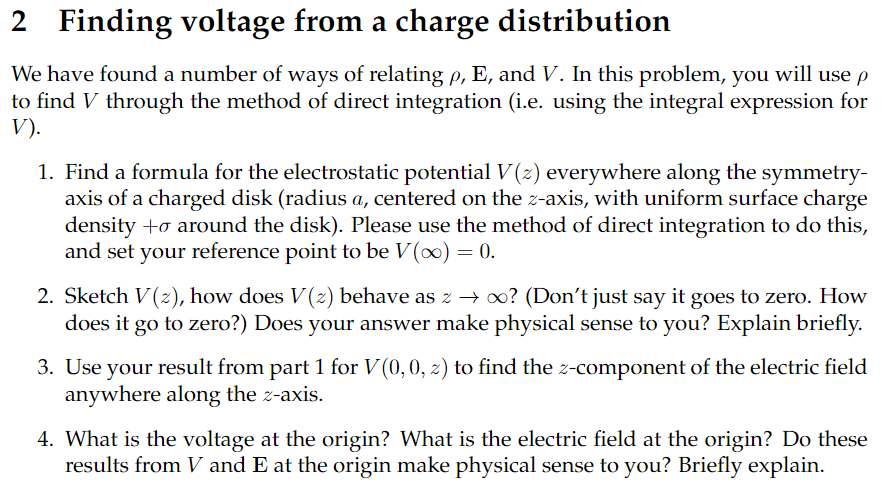

1. The integral

$$
V = \frac{1}{4\pi\epsilon_0} \frac{q}{r} \\
= \frac{1}{4\pi\epsilon_0} \int_0^{2\pi} \int_0^{a} \frac{\sigma}{|\mathcal{R}|} s ds d\phi \\
$$
Where $\mathcal{R}$ is the separation vector $\mathcal{R} = r-r' = z\hat z-s\hat s$
$$
|\mathcal{R}| = \sqrt{z^2+s^2} \\
V = \frac{\sigma}{4\pi\epsilon_0} 2\pi \int_0^a \frac{s}{\sqrt{z^2+s^2}} ds
$$

In [43]:
from sympy import symbols

s, z, a = symbols('s, z, a')
v_integrand = s / (z**2 + s**2)**(1/2)
v_integrand

s/(s**2 + z**2)**0.5

In [44]:
V_int = integrate(v_integrand, s) #indefinite integral
V_int # evaluate for s=0, s=a  

1.0*z**1.0*(s**2/z**2 + 1)**0.5

This can be formatted as $$\left. \sqrt{s^2+z^2}\right|_0^a$$ 

$s=0: \sqrt{z^2}$ <br> 
$s=a: \sqrt{a^2+z^20}$

Thus our voltage is

$$
V(z) = \frac{\sigma}{2\epsilon_0}  \left(\sqrt{a^2+z^2} - |z| \right)
$$
Where the absolute value comes from the $\sqrt{z^2}$ term. This goes to zero for $z \rightarrow \infty$.

2. Voltage plot

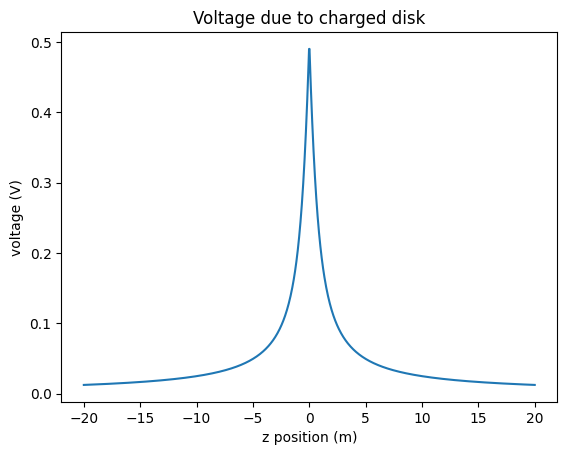

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def V(z, params):
    sigma, ep0, a = params
    return sigma / (2*ep0) * ((a**2 + z**2)**(1/2) - np.abs(z))

sigma = 1
ep0 = 1
a = 1
params = (sigma, ep0, a)

z_vals = np.linspace(-20, 20, 1000)

plt.plot(z_vals, V(z_vals, params))
plt.xlabel('z position (m)')
plt.ylabel('voltage (V)')
plt.title('Voltage due to charged disk');

We chose $\sigma$ and $\epsilon_0$ arbitrarily since they only scale the plot vertically. This result appears to decrease to zero only when $a <<z$, since $\sqrt{a^2+z^2}\approx \sqrt{z^2}$ for sufficiently large $z$. This makes sense physically since the limit still converges to zero as one would expect, and doesn't blow up to infinity at $z=0$


3. Electric field

$$
E = -\nabla V
$$

Sympy doesn't like absolute values. The derivative of $V$ with respect to $z$ (since there is no $x$ or $y$ components):

$$
\begin{cases}
\frac{\sigma}{2\epsilon_0}\left(\frac{z}{\sqrt{a^2+z^2}}\right) & z>0 \\
-\frac{\sigma}{2\epsilon_0}\left(\frac{z}{\sqrt{a^2+z^2}}\right) & z<0 \\

\end{cases}
$$
With E=0 due to $-\frac{dV}{dz}=0$/undefined at $z=0$


4. Voltage at the origin simplifies to
$$
V(0) = \frac{\sigma a}{2\epsilon_0}
$$
but the discontinuous derivative in $E_z$ means the electric field is split up

$$
E_z(+0) = \frac{\sigma}{2\epsilon_0} \\
E_z(-0) = -\frac{\sigma}{2\epsilon_0}
$$

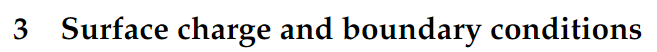

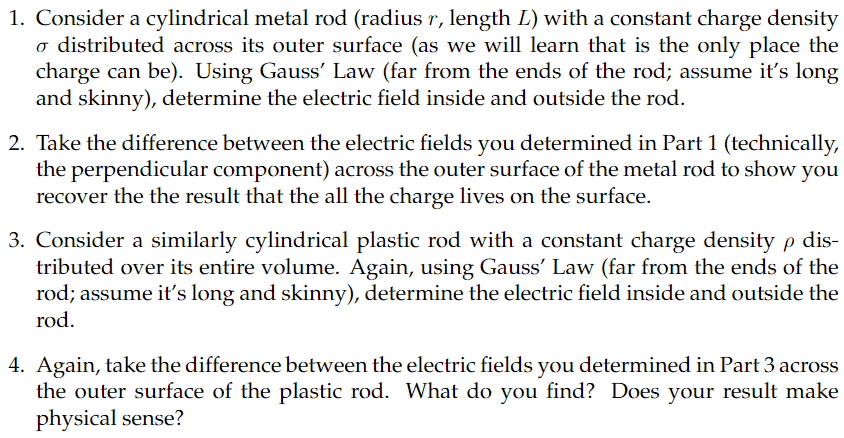

1. <br>
Inside: no charge is enclosed

$$
E=0
$$

Outside: all charge is enclosed:

$$
2\pi s  L * E_s= \frac{\sigma * 2\pi r l}{\epsilon_0}\\
E_s(s)=\frac{\sigma r}{s\epsilon_0}
$$

2. Since the difference in the disk was $E_z(+0) - E_z(-0) = 2*\frac{\sigma}{2\epsilon_0}$, and $E_s(r) = \frac{\sigma}{\epsilon_0}$ comes out to be the same value, the equivalent field shows that all charge lives on the surface in this example.

3. Uniform charge density $\rho$ 

Inside: some charge enclosed.
$$
2 \pi s L *E_s = 2\pi\frac{\rho}{\epsilon_0}\frac{s^2}{2} \\
E_s(s) = \frac{\rho s}{2\epsilon_0}

$$
Outide: all charge is enclosed

$$
E_s(s) = \frac{\rho r^2}{2s\epsilon_0}
$$

4. The surface electric field is continuous, $E_s(-r) = E_s(+r) = \frac{\rho r^2}{2s\epsilon_0}, \Delta E_s(\pm r) =0$ so there is no surface charge, which makes sense since we only have a volume charge in the problem

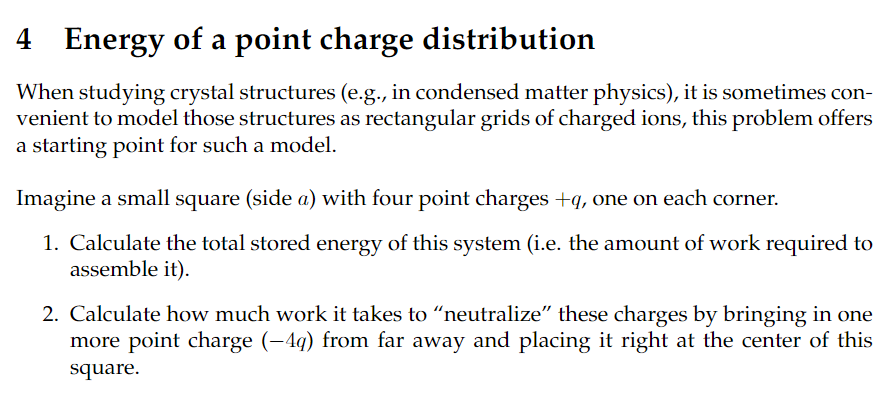

Total energy: find potential of each electron in this configuration

$\delta r = a$: $U = \frac{1}{4\pi \epsilon_0}\frac{q^2}{a}$
$\delta r = a\sqrt{2}$: $U = \frac{1}{4\pi \epsilon_0}\frac{q^2}{a\sqrt{2}}$
Each charge potential:
$$
\frac{1}{4\pi \epsilon_0}\left(2\frac{q^2}{a} + \frac{q^2}{a\sqrt{2}}\right)
$$
Four charges:
$$
\frac{1}{\pi \epsilon_0}\left(2\frac{q^2}{a} + \frac{q^2}{a\sqrt{2}}\right)

$$


To neutralize:

0 inner charge potential four positive charges:

$$
4*\frac{\sqrt{2}}{4\pi\epsilon_0}\frac{q}{a}\\ = \frac{q\sqrt 2}{4\pi\epsilon_0 a}
$$

To bring -4 charge to the center of +4 charge:

$$
W = qV - 0 = -= \frac{4q\sqrt 2}{4\pi\epsilon_0 a}$$